In [139]:
# %run ../code/utils.ipynb

In [140]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data_dir = f"{project_dir}data\\matchup_summary\\"

In [142]:
df = pd.read_csv(data_dir + 'weekly_position_scoring_with_matchup_result.csv')

In [143]:
cols = ['season_week','manager', 'points_for', 'QB_points', 'DEF_points', 'WR_total_points', 'RB_total_points','TE_total_points']

In [144]:
df = df.loc[df['season_week'].str.contains('2023'), cols]

In [145]:
df.shape

(224, 8)

In [146]:
df.set_index('season_week', inplace=True)

In [147]:
num_cols = list(df.select_dtypes(include=np.number).columns)
num_cols.remove('points_for')

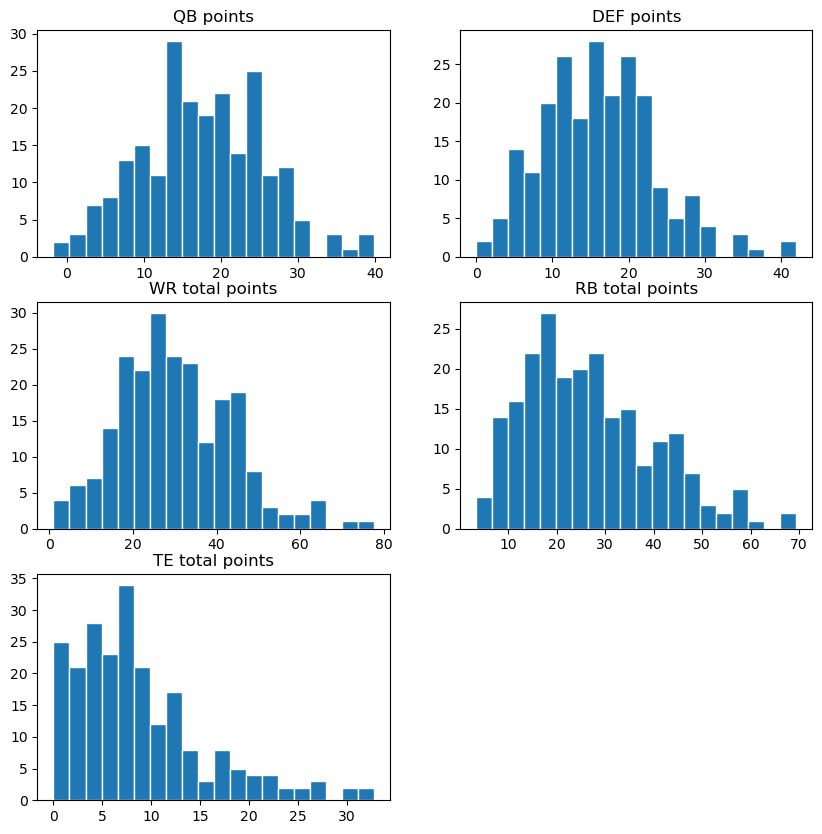

In [148]:
fig = plt.figure(figsize=(10,10))
base_plot_parameter = 320
for i, col in zip(range(1,len(num_cols)+1), num_cols):
    ax = fig.add_subplot(base_plot_parameter + i)
    ax.hist(df[col], bins = 20, edgecolor = 'white')
    title = ' '.join(col.split('_'))
    ax.set_title(title)
    

In [149]:
df_mean = df.groupby('manager').agg(['mean'])

In [150]:
df_mean

,points_for,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points
,mean,mean,mean,mean,mean,mean
manager,,,,,,
Buddy,101.628571,22.414286,15.071429,29.178571,15.564286,11.400000
Eric,105.880000,17.180000,14.352941,26.923529,27.376471,12.576471
Frags,88.007143,19.364286,9.571429,27.857143,18.721429,6.207143
Jake,106.823750,14.417500,16.500000,35.781250,25.325000,6.175000
Jones,113.722500,15.148750,16.125000,27.816250,41.578750,6.303750
Kyle,106.858750,16.985000,16.312500,22.273750,34.906250,10.193750
Lauren,108.737500,18.375000,16.562500,31.912500,24.087500,9.006250
Michael,107.220000,15.243529,19.764706,34.894118,22.058824,8.494118


In [151]:
df_std = df.groupby('manager').agg(['std'])
df_std

,points_for,QB_points,DEF_points,WR_total_points,RB_total_points,TE_total_points
,std,std,std,std,std,std
manager,,,,,,
Buddy,21.039067,6.411976,6.342340,11.444661,9.396940,7.561848
Eric,17.956450,9.623323,4.314817,13.908430,11.128934,9.627534
Frags,15.655227,9.693926,5.625687,12.622002,8.280485,5.391084
Jake,21.077473,6.478888,7.136759,13.775157,10.479027,5.310053
Jones,21.528339,6.213551,7.219187,10.025259,17.866736,5.576557
Kyle,17.707543,8.703098,8.138130,8.814796,13.132020,5.847902
Lauren,22.516103,8.862835,9.084556,12.144786,11.241167,6.338924
Michael,23.271191,6.587698,6.647644,16.238399,7.686356,6.605440


In [152]:
sc = StandardScaler()

In [153]:

mean_z = sc.fit_transform(df_mean)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [154]:
df_mean_z = pd.DataFrame(mean_z)
df_mean_z.set_index(df_mean.index, inplace=True)

df_mean_z.rename({
             0: 'Mean Points For Z',
             1: 'Mean QB Z',
             2: 'Mean DEF Z',
             3: 'Mean WR Z',
             4: 'Mean RB Z',
             5: 'Mean TE Z'}, axis =1, inplace=True)
df_mean_z

,Mean Points For Z,Mean QB Z,Mean DEF Z,Mean WR Z,Mean RB Z,Mean TE Z
manager,,,,,,
Buddy,-0.788896,2.053977,-0.402611,-0.156136,-1.447219,1.124819
Eric,-0.119674,-0.142128,-0.713530,-0.576658,0.076827,1.614830
Frags,-2.933061,0.774314,-2.782689,-0.402557,-1.039874,-1.038053
Jake,0.028882,-1.301166,0.215592,1.075136,-0.187861,-1.051441
Jones,1.114822,-0.994362,0.053313,-0.410183,1.909250,-0.997815
Kyle,0.034392,-0.223942,0.134452,-1.443752,1.048343,0.622405
Lauren,0.330128,0.359248,0.242638,0.353689,-0.347527,0.127801
Michael,0.091257,-0.954596,1.628365,0.909703,-0.609273,-0.085507
Nate,-0.666875,-0.573227,1.081075,-0.592467,-0.790238,1.741774


[2024-01-18 17:45:28,166 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x000002101CD47010>
[2024-01-18 17:45:28,166 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x000002101CD47010>


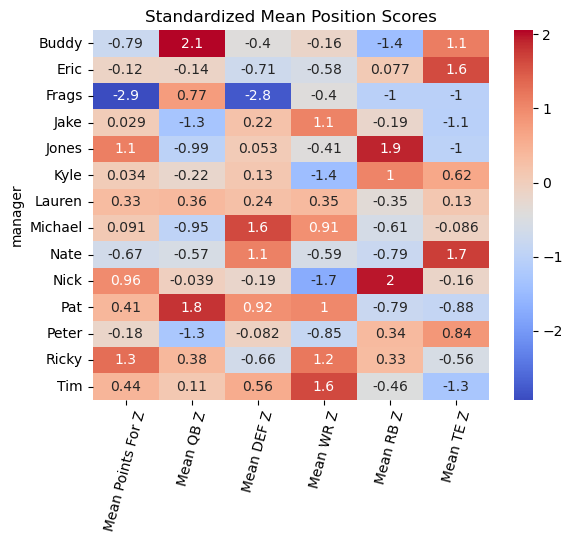

In [155]:
plt.figure()
plt.title('Standardized Mean Position Scores')
sns.heatmap(df_mean_z, cmap='coolwarm', annot=True)
plt.xticks(rotation=75);

In [156]:
std_z = sc.fit_transform(df_std)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [157]:
df_std_z = pd.DataFrame(std_z)
df_std_z.set_index(df_std.index, inplace=True)

df_std_z.rename({
             0: 'STD Points For (Z)',
             1: 'STD QB (Z)',
             2: 'STD DEF(Z)',
             3: 'STD WR (Z)',
             4: 'STD RB (Z)',
             5: 'STD TE (Z)'}, axis =1, inplace=True)

df_std_z

,STD Points For (Z),STD QB (Z),STD DEF(Z),STD WR (Z),STD RB (Z),STD TE (Z)
manager,,,,,,
Buddy,0.109398,-0.754822,-0.417977,-0.436687,-0.695661,0.735134
Eric,-0.881688,1.166192,-1.648621,0.638800,0.018838,2.069790
Frags,-1.621550,1.208426,-0.852963,0.077248,-1.156232,-0.667414
Jake,0.121746,-0.714796,0.064211,0.580624,-0.249268,-0.719769
Jones,0.266703,-0.873520,0.114243,-1.056286,2.798381,-0.547579
Kyle,-0.961714,0.615717,0.672013,-1.584678,0.845171,-0.372260
Lauren,0.584277,0.711271,1.246464,-0.131067,0.065138,-0.055007
Michael,0.827044,-0.649707,-0.232666,1.655881,-1.401327,0.117191
Nate,0.235363,-2.341746,-0.572208,1.167503,-0.289413,1.963299


[2024-01-18 17:45:28,452 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x000002101CB7D450>
[2024-01-18 17:45:28,452 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x000002101CB7D450>


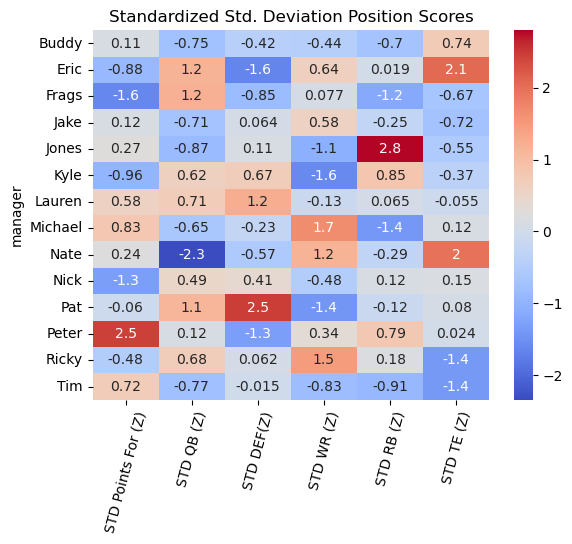

In [158]:
plt.figure()
plt.title('Standardized Std. Deviation Position Scores')
sns.heatmap(df_std_z, cmap='coolwarm', annot=True)
plt.xticks(rotation=75);